In [224]:
# Import Qiskit
from qiskit import QuantumCircuit
from qiskit import Aer, transpile
from qiskit.tools.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi
import numpy as np
from qiskit import transpile
from qiskit.quantum_info import Kraus, SuperOp, Operator
from qiskit.extensions import RYGate
from qiskit.providers.aer import AerSimulator

In [225]:
# Import from Qiskit Aer noise module
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise import QuantumError, ReadoutError
from qiskit.providers.aer.noise import pauli_error
from qiskit.providers.aer.noise import depolarizing_error
from qiskit.providers.aer.noise import thermal_relaxation_error

In [247]:
m=30
p=0
pi=np.pi
Ng=2*m+1
theta_0=0.5
theta_m=2*Ng*theta_0+pi/2
theta_true=2*Ng*theta+pi/2

In [300]:
# Create an empty noise model
noise_depolarizing = NoiseModel()
noise_depolarizing.add_basis_gates(['unitary'])
# Add depolarizing error to all single qubit u1, u2, u3 gates
error = depolarizing_error(1, 2)
noise_depolarizing.add_all_qubit_quantum_error(error, 'I_Ry')
# Create noisy simulator backend
sim_noise = AerSimulator(noise_model=noise_depolarizing)
# Print noise model info
print(noise_depolarizing)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'unitary']
  Instructions with noise: ['I_Ry']
  All-qubits errors: ['I_Ry']


In [299]:
print(error)

QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.0625, QasmQobjInstructions = [[{'name': 'x', 'qubits': [0]}]
  P(1) = 0.0625, QasmQobjInstructions = [[{'name': 'y', 'qubits': [0]}]
  P(2) = 0.0625, QasmQobjInstructions = [[{'name': 'z', 'qubits': [0]}]
  P(3) = 0.0625, QasmQobjInstructions = [[{'name': 'x', 'qubits': [1]}]
  P(4) = 0.0625, QasmQobjInstructions = [[{'name': 'x', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}]
  P(5) = 0.0625, QasmQobjInstructions = [[{'name': 'y', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}]
  P(6) = 0.0625, QasmQobjInstructions = [[{'name': 'z', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}]
  P(7) = 0.0625, QasmQobjInstructions = [[{'name': 'y', 'qubits': [1]}]
  P(8) = 0.0625, QasmQobjInstructions = [[{'name': 'x', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}]
  P(9) = 0.0625, QasmQobjInstructions = [[{'name': 'y', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}]
  P(10) = 0.0625, QasmQobjInstructions = [[{'name': 'z', 'qubits': [0]}, {'name': 'y', '

In [291]:
theta=2*pi/3
A=Operator([[1,0],[0,1]])
B=Operator(RYGate(theta))
C=A.tensor(B)
C

Operator([[ 0.5      +0.j, -0.8660254+0.j,  0.       +0.j, -0.       +0.j],
          [ 0.8660254+0.j,  0.5      +0.j,  0.       +0.j,  0.       +0.j],
          [ 0.       +0.j, -0.       +0.j,  0.5      +0.j, -0.8660254+0.j],
          [ 0.       +0.j,  0.       +0.j,  0.8660254+0.j,  0.5      +0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

In [292]:
'unitary' in AerSimulator().configuration().basis_gates

True

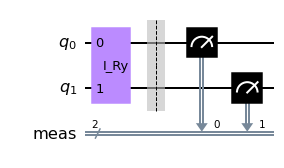

In [298]:
circ=QuantumCircuit(2)
circ.unitary(C,[0,1],label='I_Ry')
circ.measure_all()
circ.draw('mpl')

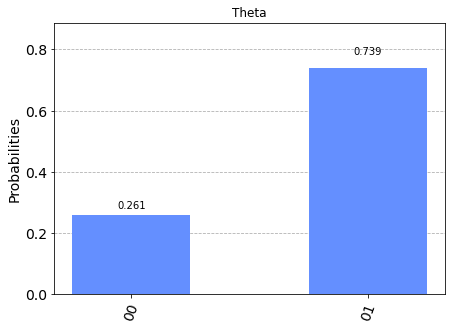

In [294]:
simulator=Aer.get_backend('aer_simulator')
circ=transpile(circ,simulator)
result=simulator.run(circ).result()
counts=result.get_counts(circ)
plot_histogram(counts,title='Theta')

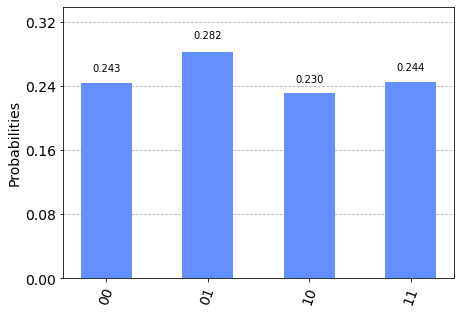

In [301]:
# Transpile circuit for noisy basis gates
circ_tnoise = transpile(circ, sim_noise)

# Run and get counts
result_noise = sim_noise.run(circ_tnoise).result()
counts_noise = result_noise.get_counts(0)

# Plot noisy output
plot_histogram(counts_noise)

In [185]:
print(error)
print()

QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.25, QasmQobjInstructions = [[{'name': 'x', 'qubits': [0]}]
  P(1) = 0.25, QasmQobjInstructions = [[{'name': 'y', 'qubits': [0]}]
  P(2) = 0.25, QasmQobjInstructions = [[{'name': 'z', 'qubits': [0]}]
  P(3) = 0.25, QasmQobjInstructions = [[{'name': 'id', 'qubits': [0]}]



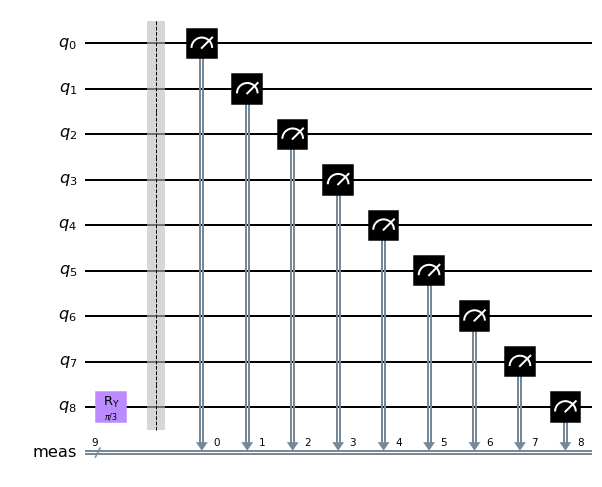

In [60]:
circ=QuantumCircuit(9)
circ.ry(pi/3,8)
circ.measure_all()
circ.draw('mpl')

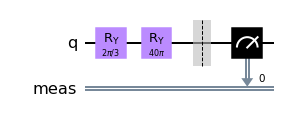

In [186]:
circ=QuantumCircuit(1)
circ.ry(2*theta,0)
circ.ry(4*m*theta,0)
circ.measure_all()
circ.draw('mpl')

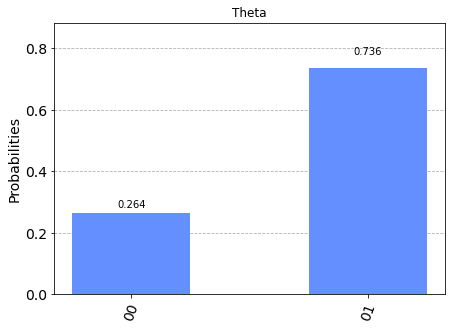

In [244]:
simulator=Aer.get_backend('aer_simulator')
circ=transpile(circ,simulator)
result=simulator.run(circ).result()
counts=result.get_counts(circ)
plot_histogram(counts,title='Theta')

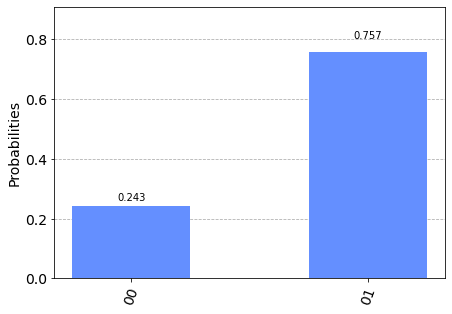

In [246]:
# Transpile circuit for noisy basis gates
circ_tnoise = transpile(circ, sim_noise)

# Run and get counts
result_noise = sim_noise.run(circ_tnoise).result()
counts_noise = result_noise.get_counts(0)

# Plot noisy output
plot_histogram(counts_noise)

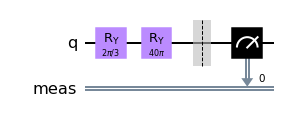

In [22]:
circ=QuantumCircuit(1)
circ.ry(2*theta,0)
circ.ry(4*m*theta,0)
circ.measure_all()
circ.draw('mpl')

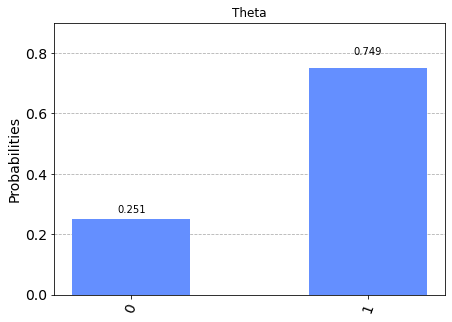

In [23]:
simulator=Aer.get_backend('aer_simulator')
circ=transpile(circ,simulator)
result=simulator.run(circ).result()
counts=result.get_counts(circ)
plot_histogram(counts,title='Theta')

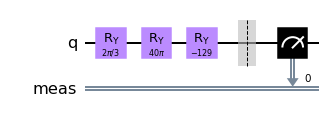

In [24]:
circn=QuantumCircuit(1)
circn.ry(2*theta,0)
circn.ry(4*m*theta,0)
circn.ry(-theta_true,0)
circn.measure_all()
circn.draw('mpl')

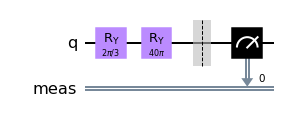

In [25]:
circi=QuantumCircuit(1)
circi.ry(2*theta,0)
circi.ry(4*m*theta,0)
circi.measure_all()
circi.draw('mpl')

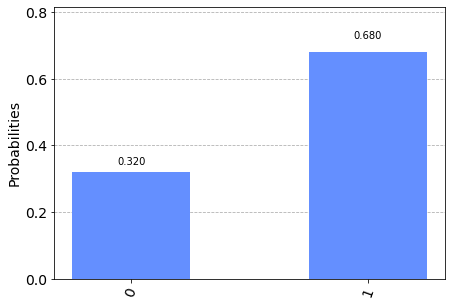

In [26]:
# Transpile circuit for noisy basis gates
circi_tnoise = transpile(circi, sim_noise)

# Run and get counts
result_i_noise = sim_noise.run(circi_tnoise).result()
counts_i_noise = result_i_noise.get_counts(0)

# Plot noisy output
plot_histogram(counts_i_noise)


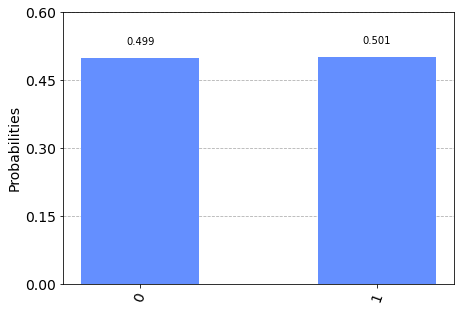

In [27]:
# Transpile circuit for noisy basis gates
circn_tnoise = transpile(circn, sim_noise)

# Run and get counts
result2_noise = sim_noise.run(circn_tnoise,shots=10000).result()
counts2_noise = result2_noise.get_counts(0)

# Plot noisy output
plot_histogram(counts2_noise)


In [28]:
print(counts2_noise)

{'0': 4992, '1': 5008}


In [29]:
n0=counts2_noise['0']
n1=counts2_noise['1']

In [30]:
import scipy.optimize as opt

In [31]:
def func(x):
    ans=-np.log((1+(p**m)*np.sin(2*Ng*(x[0]-theta)))/2)*n0
    ans-=np.log((1+(p**m)*np.sin(2*Ng*(x[0]-theta)))/2)*n1
    return ans

In [32]:
x=opt.brute(func,[(0,pi/2)])
result=[]
result.append(x)
print(x)

[0.08154319]


In [33]:
result=x.tolist()
print(result)

[0.08154318925076302]


In [17]:
def func1(y):
    ans=y/((y**2)+1)
    return ans

In [18]:
y=opt.brute(func1,[[-3,3]])
print(y)

[-1.0000257]


In [19]:
a=2
b=[]
for i in range(3):
    b.append(a)
    a=a*2
print(b)

[2, 4, 8]


SyntaxError: invalid syntax (Temp/ipykernel_4888/2158379824.py, line 1)